In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from rcgp.rcgp import GPRegressor, RCGPRegressor
from rcgp.kernels import ConstantMean, RBFKernel, LinearMean
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,         
    "font.family": "serif",       
    "text.latex.preamble": r"\usepackage{amsmath}",
    'font.size': 24,         
    'axes.labelsize': 24,    
    'xtick.labelsize': 24,   
    'ytick.labelsize': 24,  
    'legend.fontsize': 20,
    'lines.linewidth': 4,    
    'lines.markersize': 5   
})

35


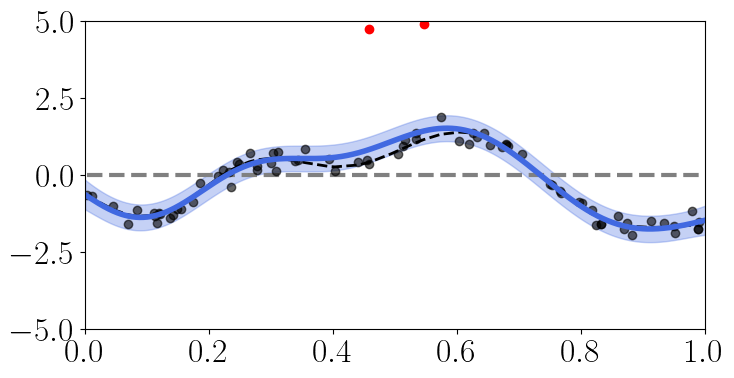

36


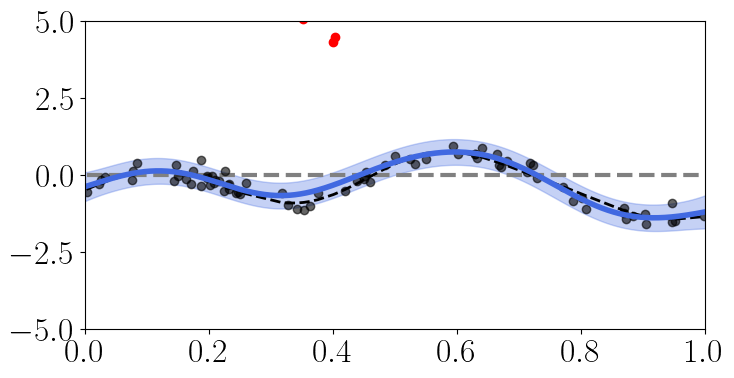

37


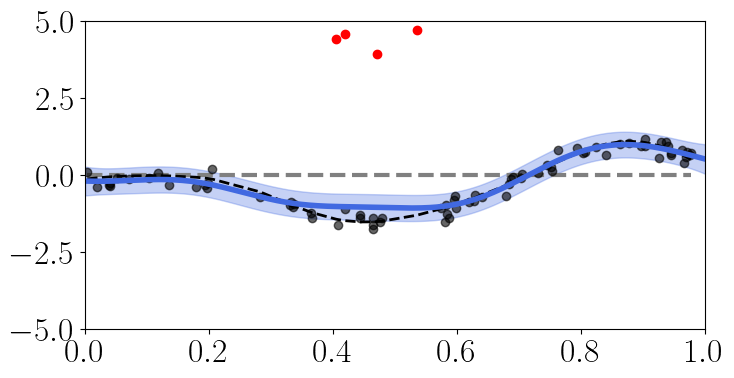

38


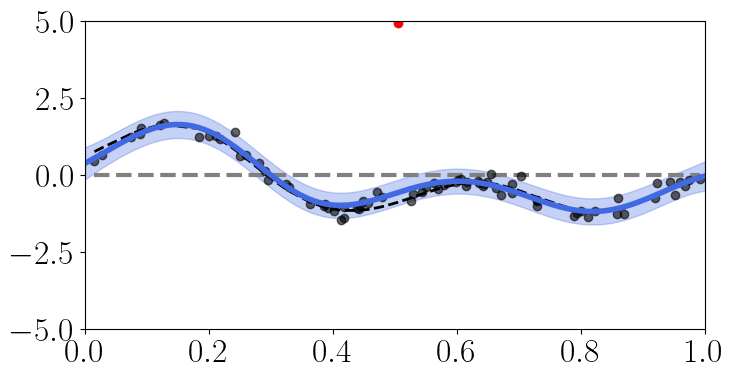

39


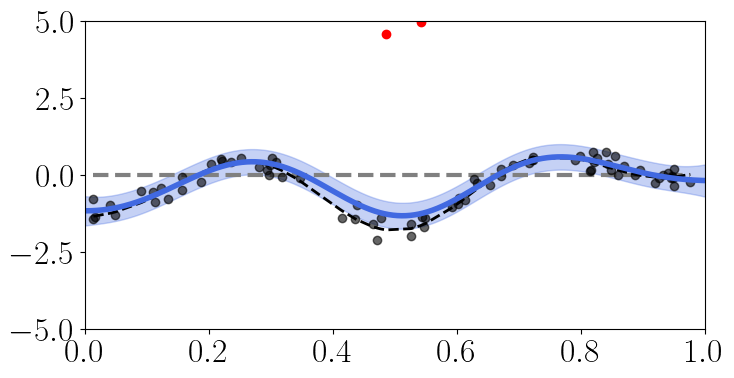

40


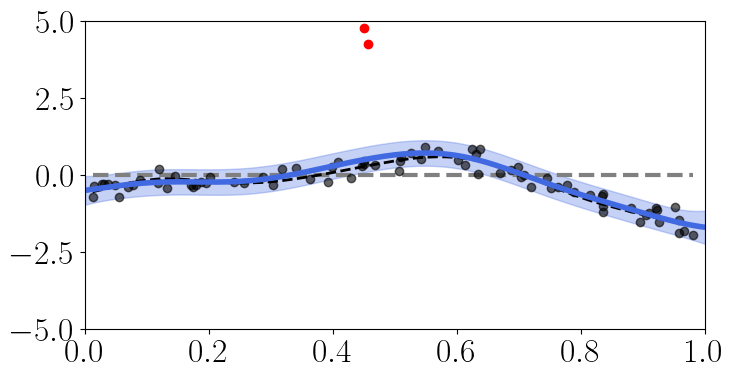

41


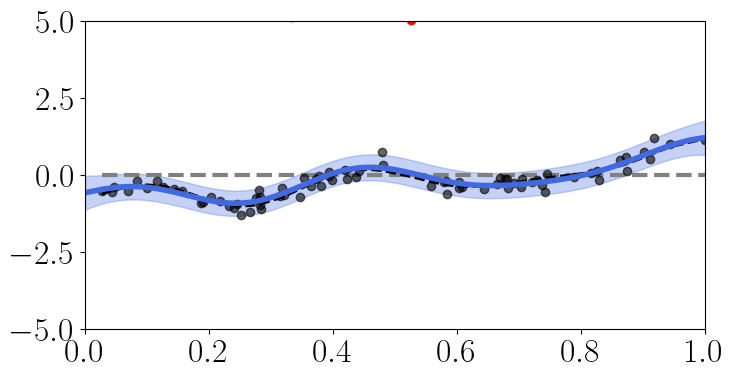

42


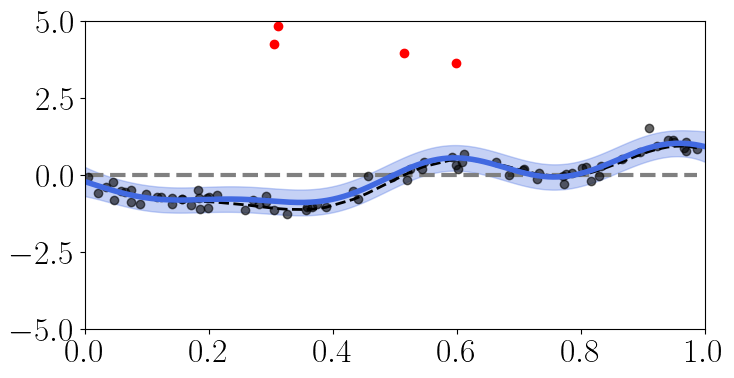

43


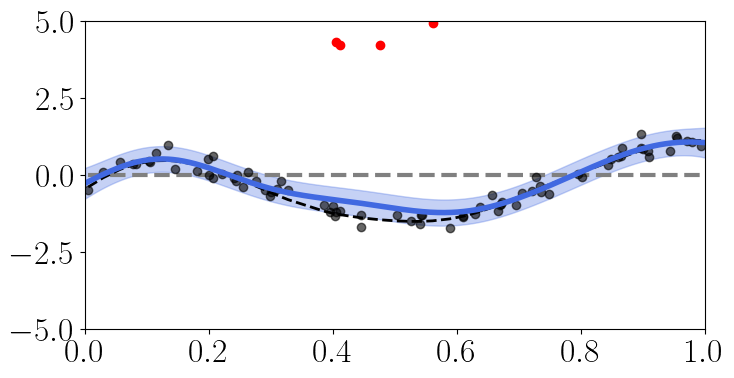

44


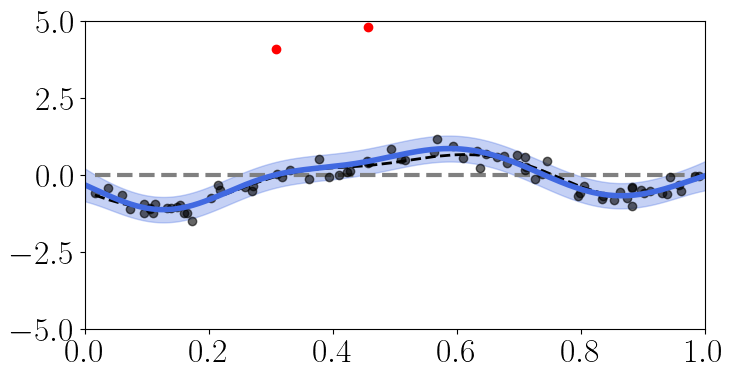

45


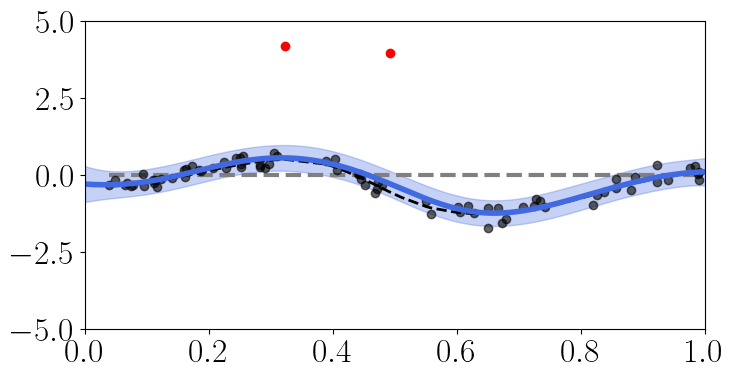

46


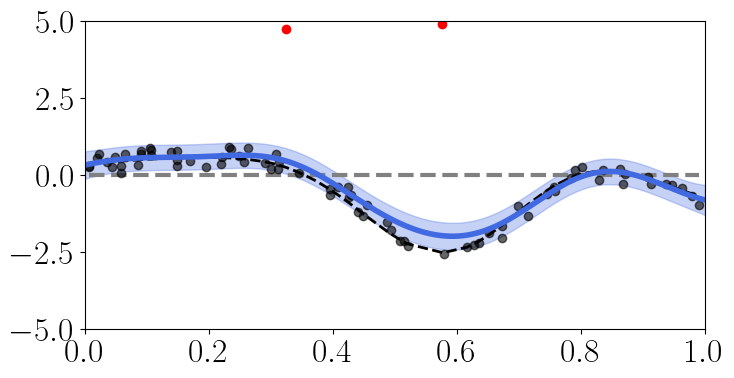

47


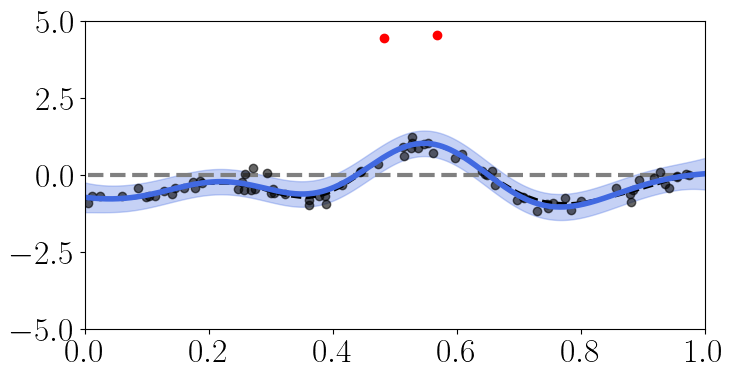

48


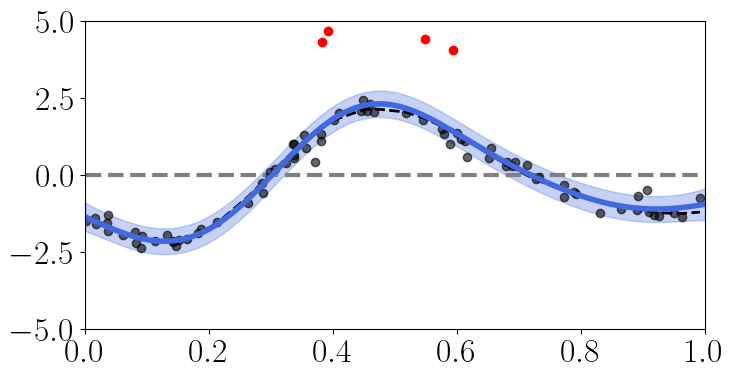

49


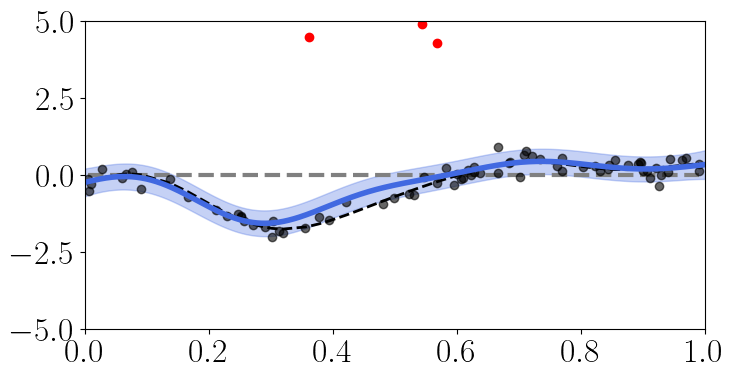

50


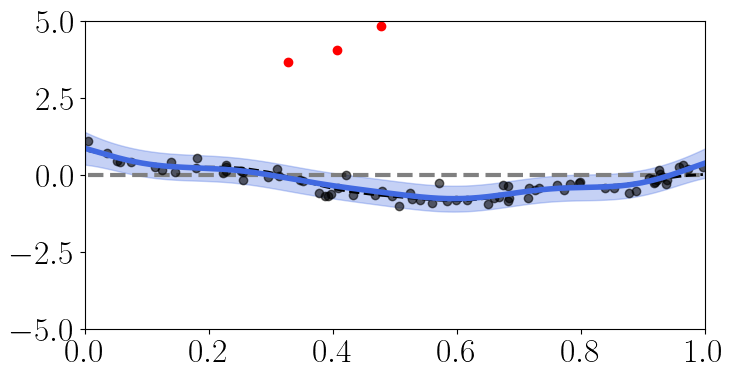

51


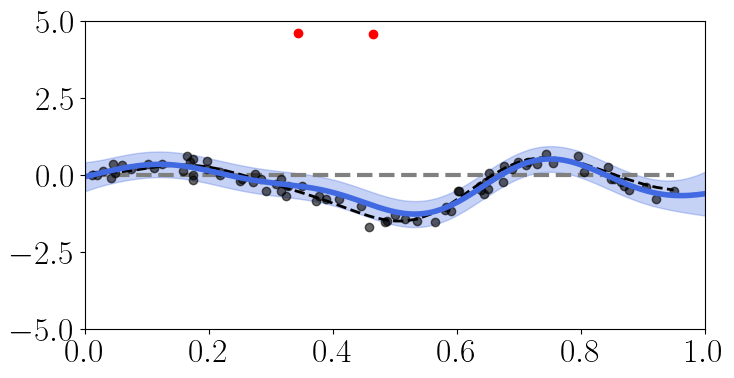

52


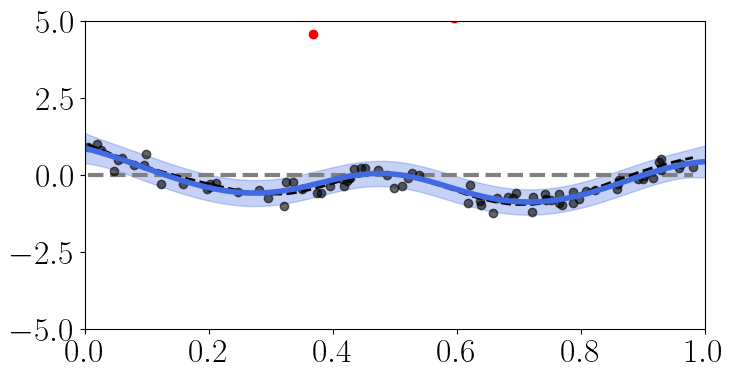

53


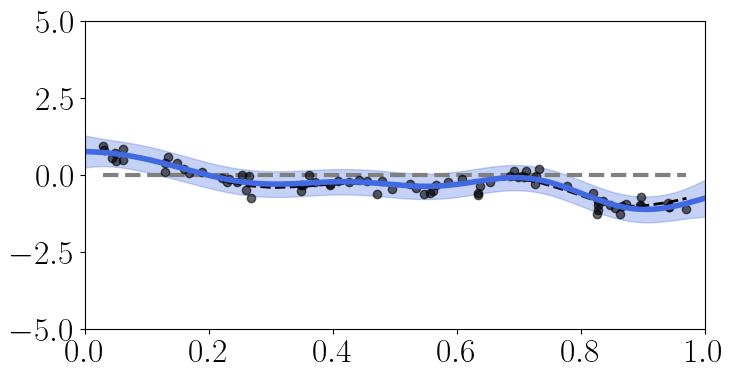

54


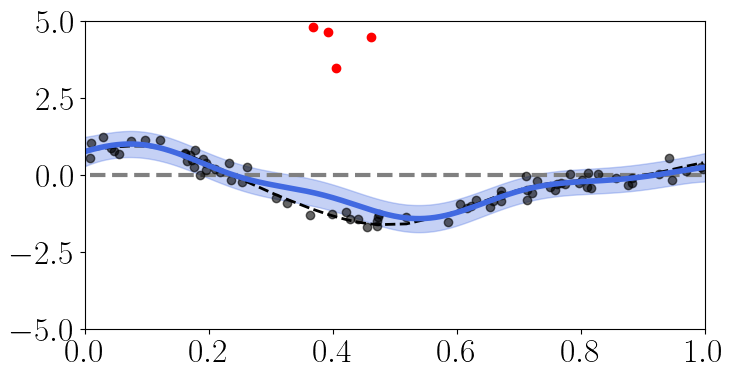

55


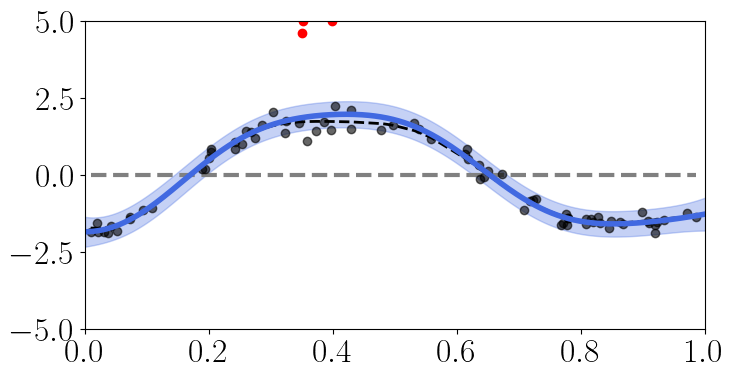

56


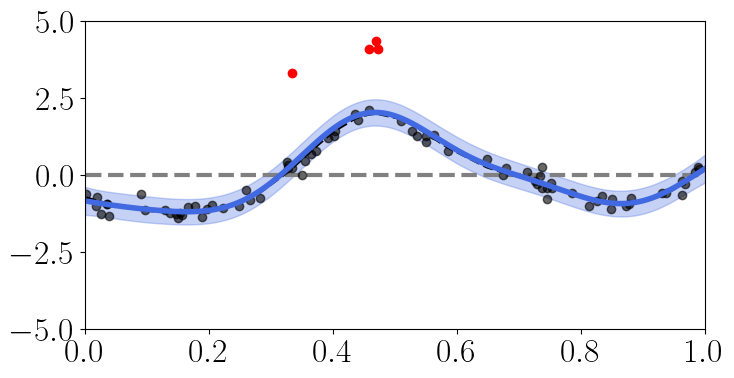

57


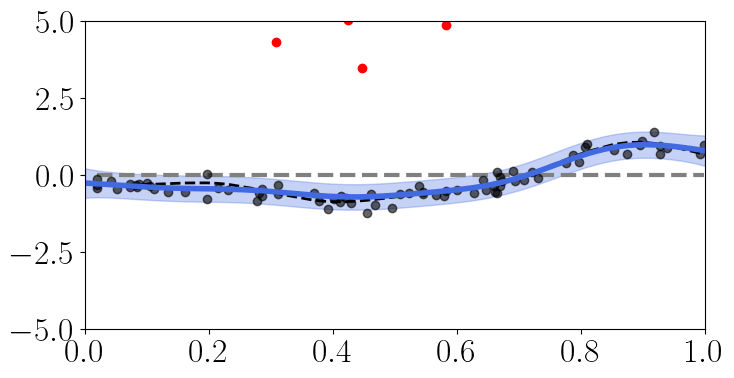

58


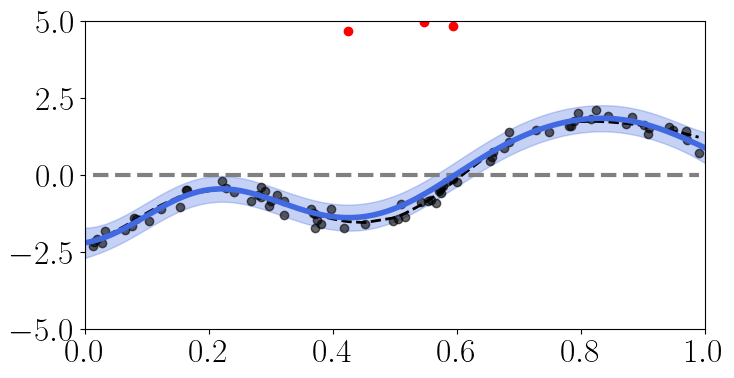

59


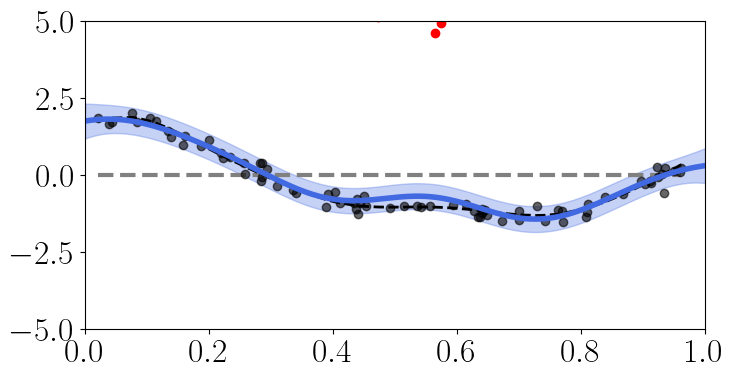

60


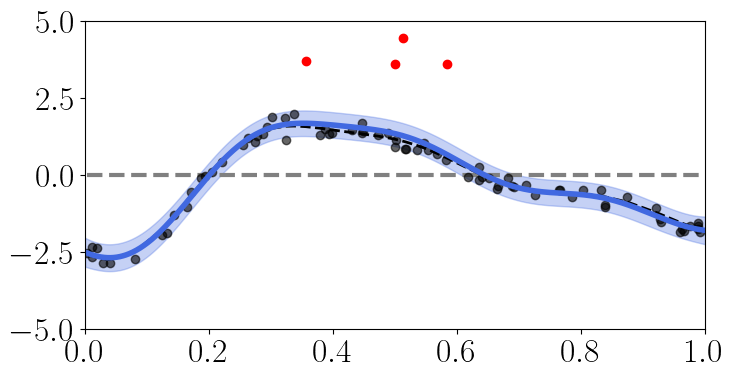

61


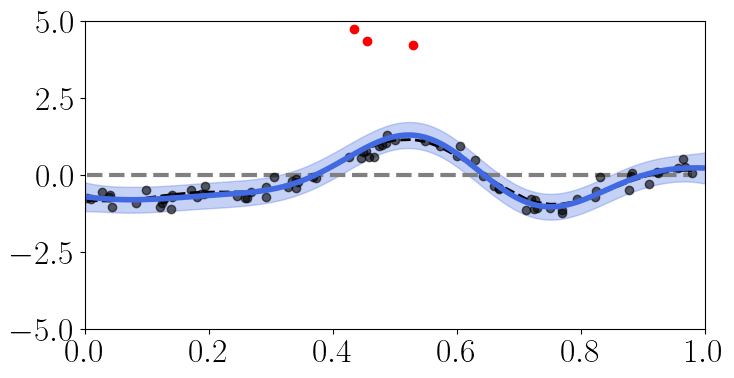

62


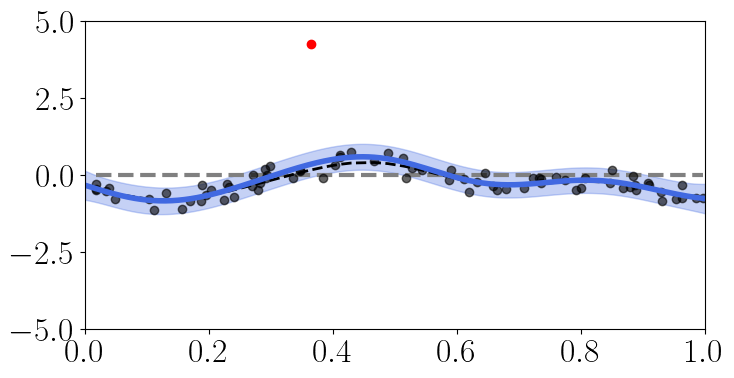

63


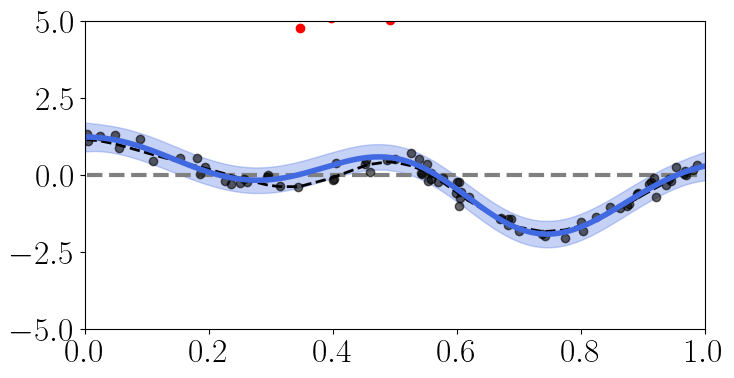

64


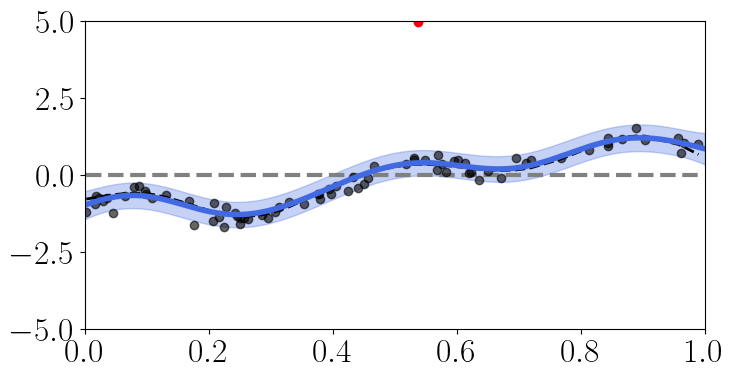

65


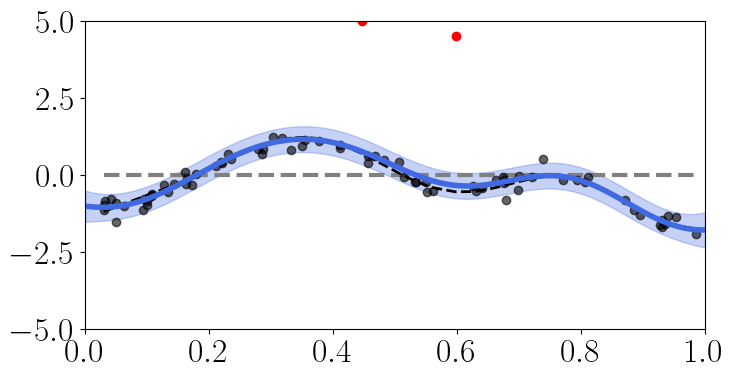

66


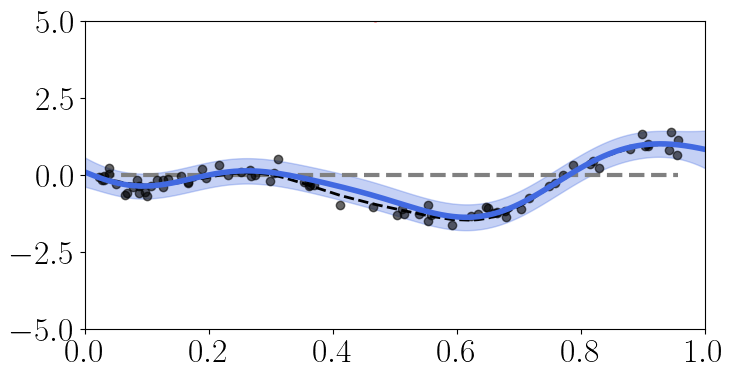

67


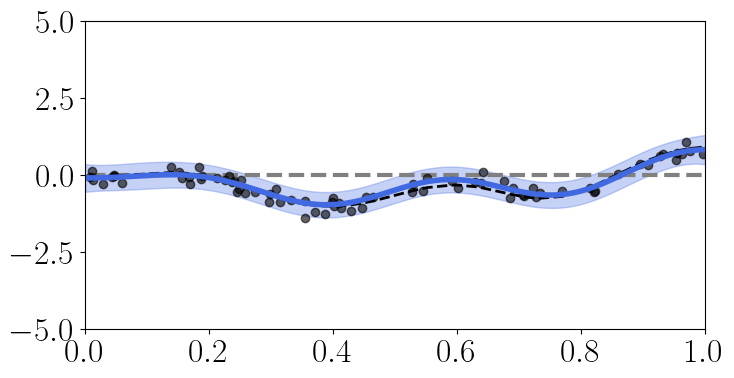

68


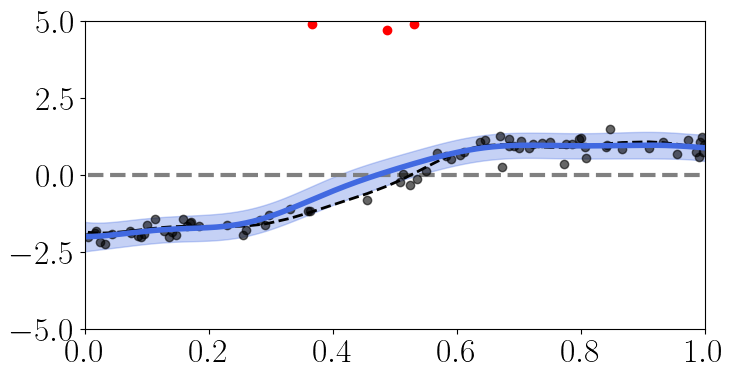

69


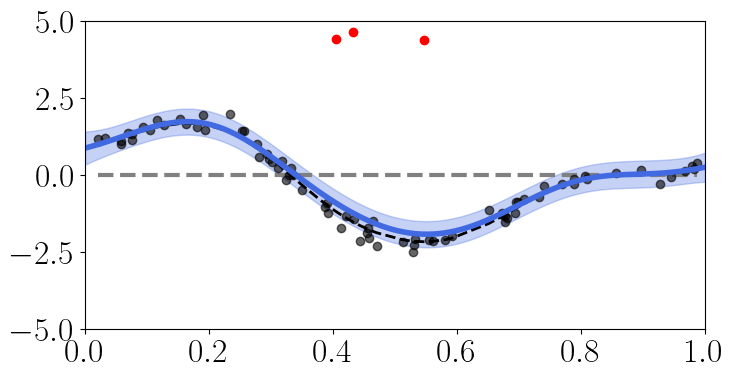

70


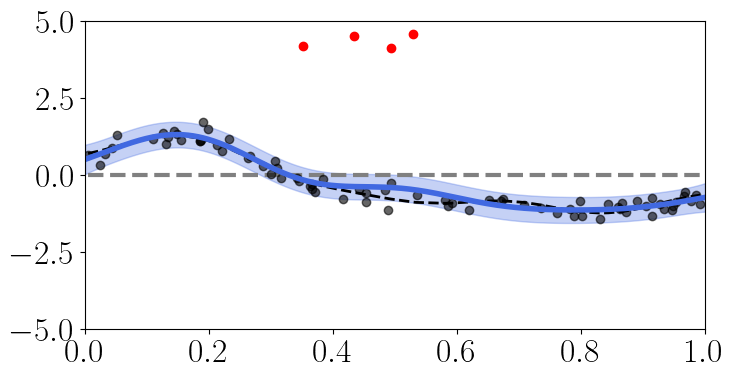

71


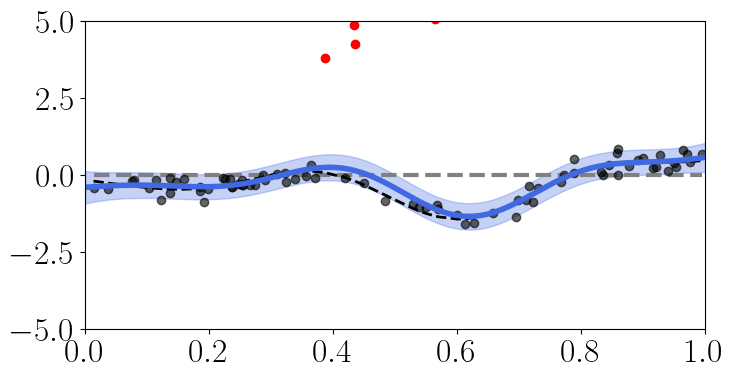

72


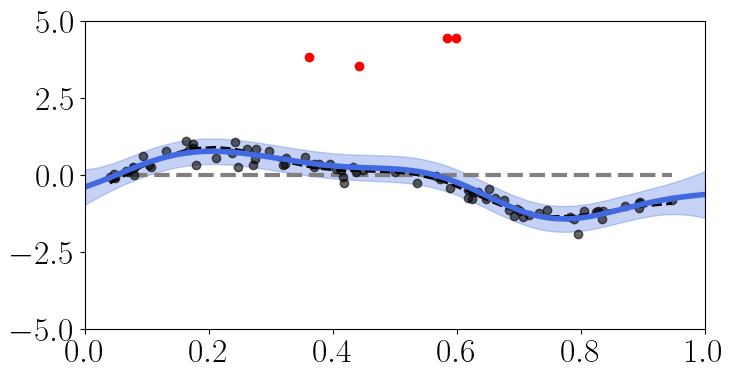

73


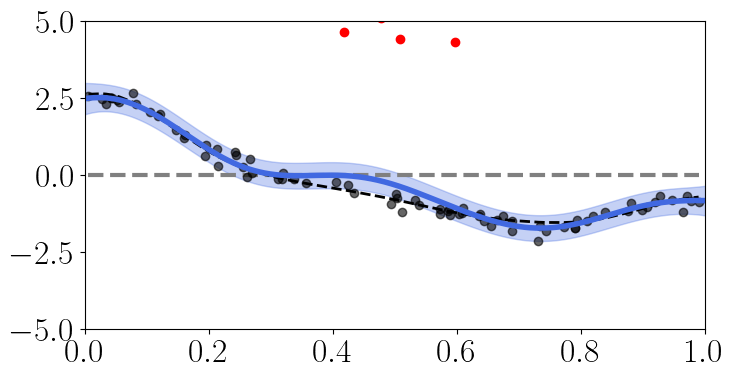

74


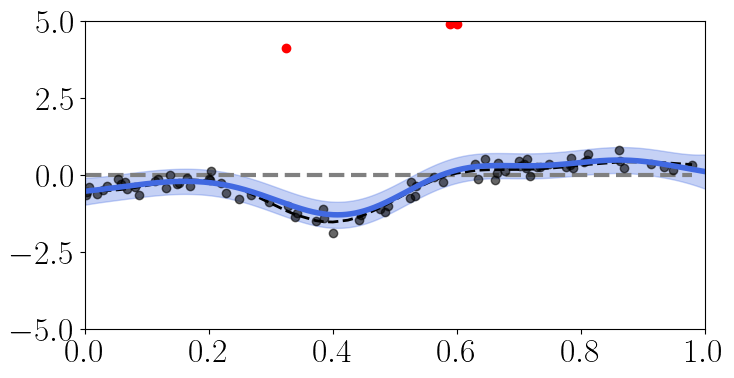

75


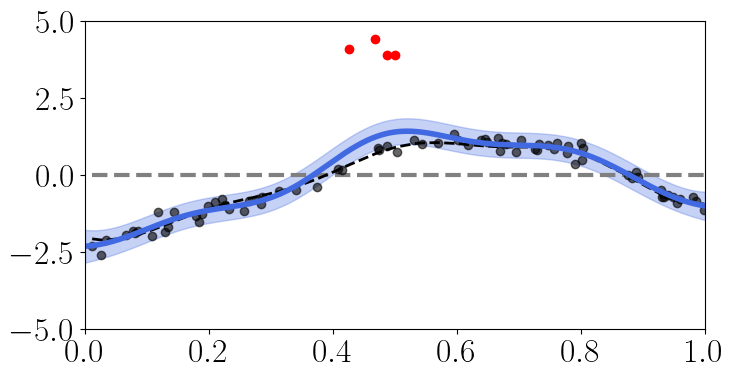

76


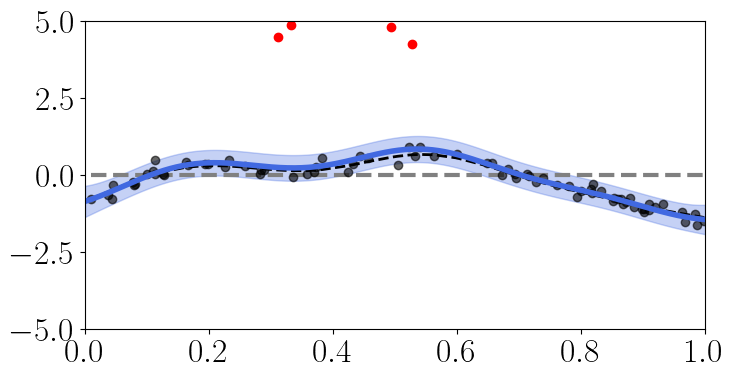

77


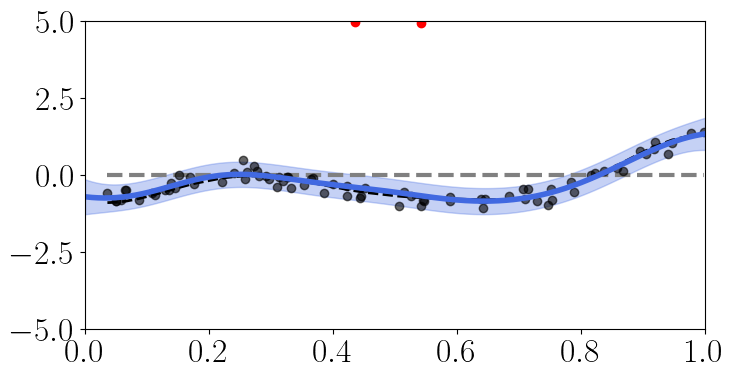

78


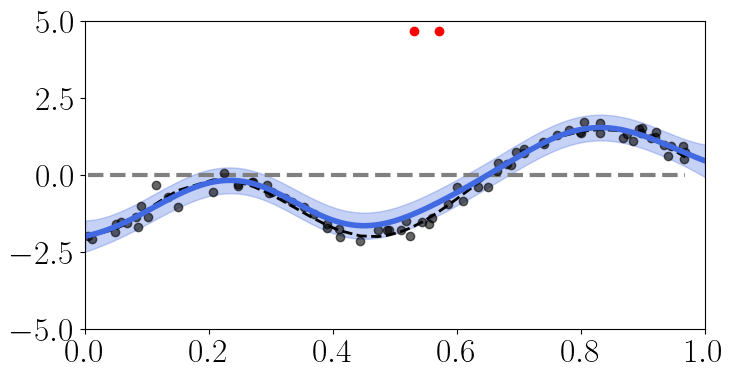

79


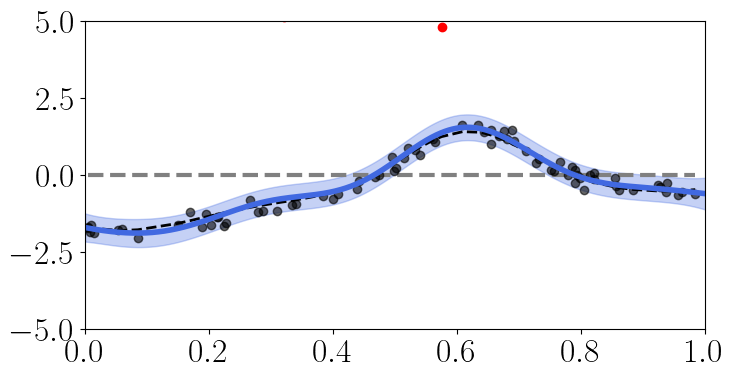

80


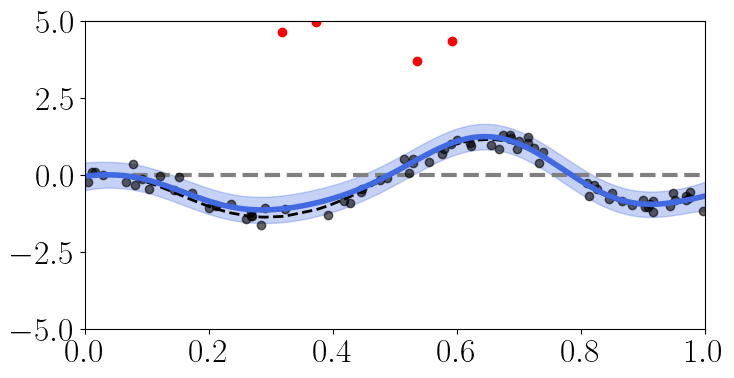

81


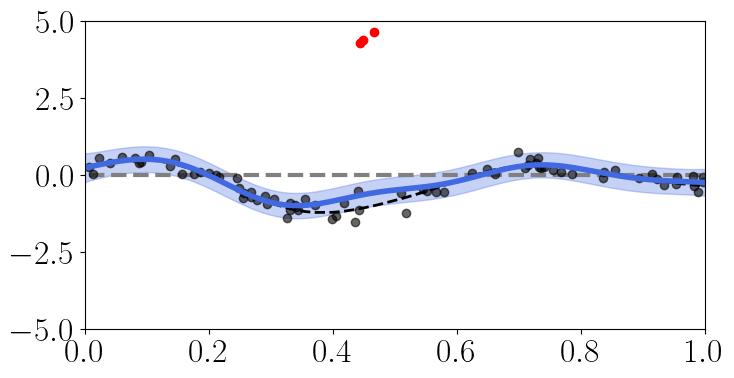

82


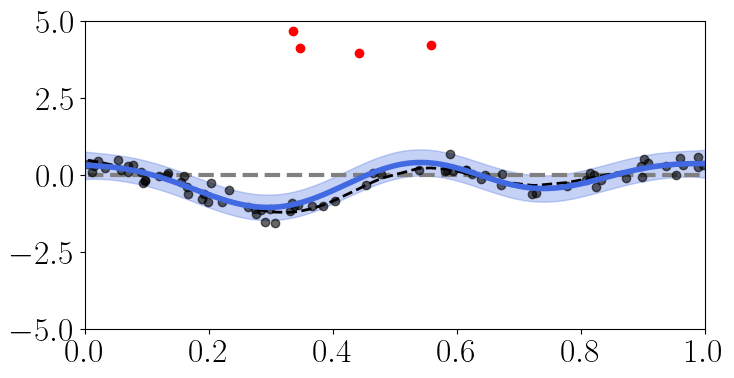

83


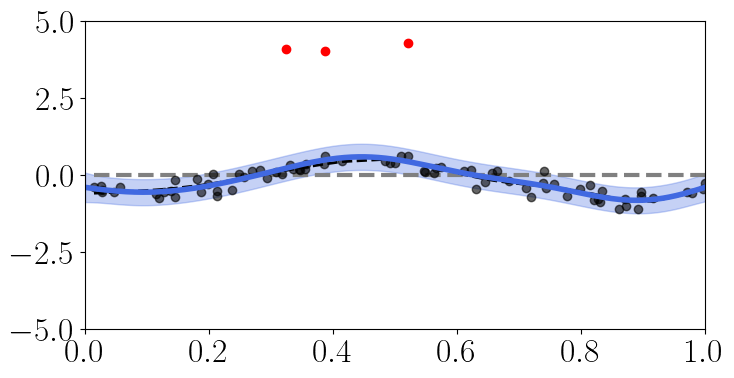

84


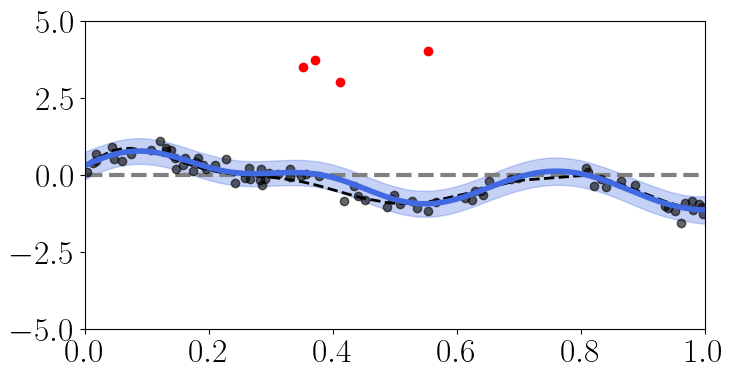

85


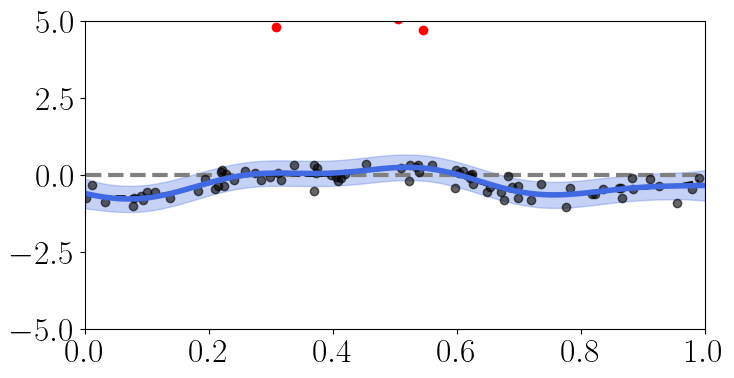

86


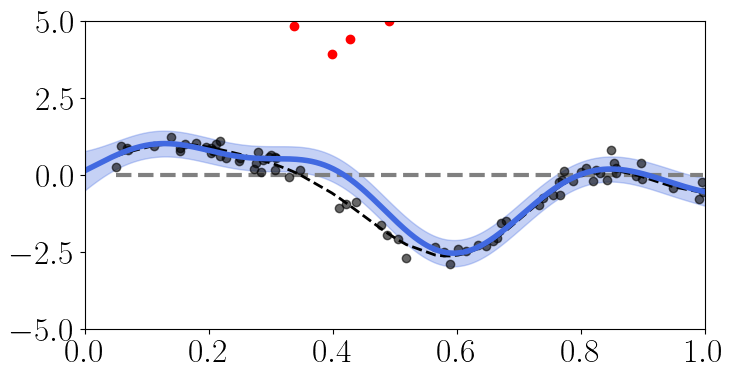

87


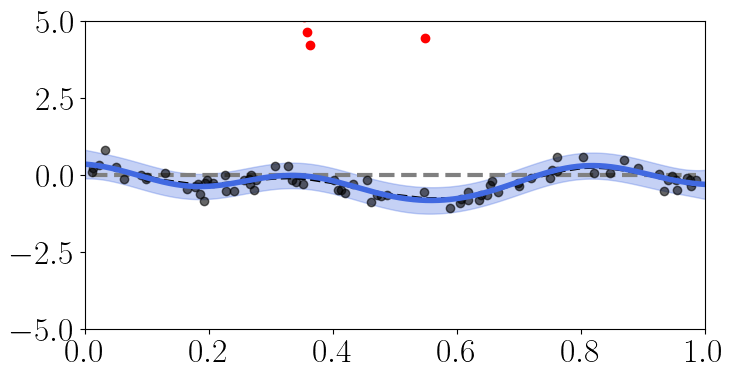

88


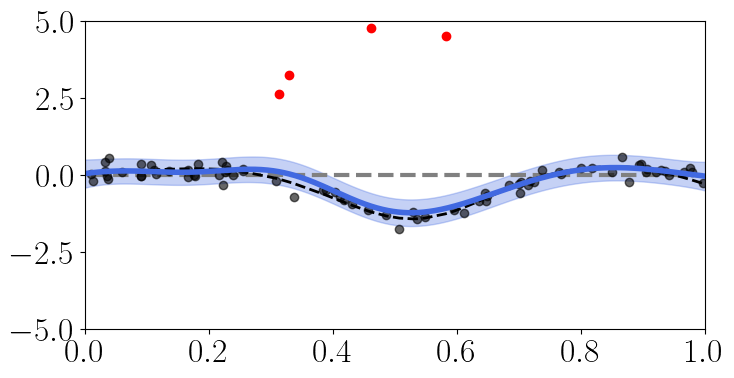

89


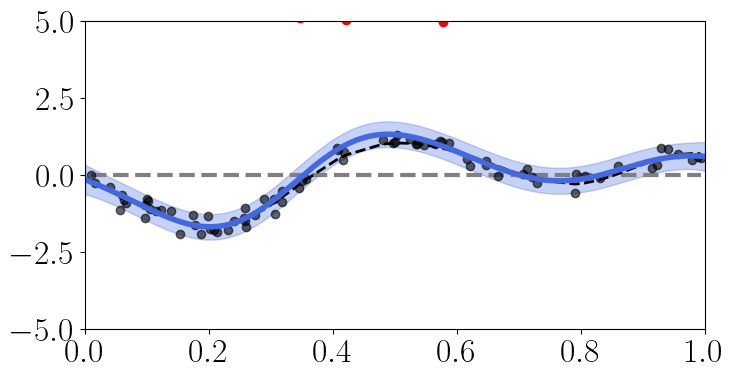

90


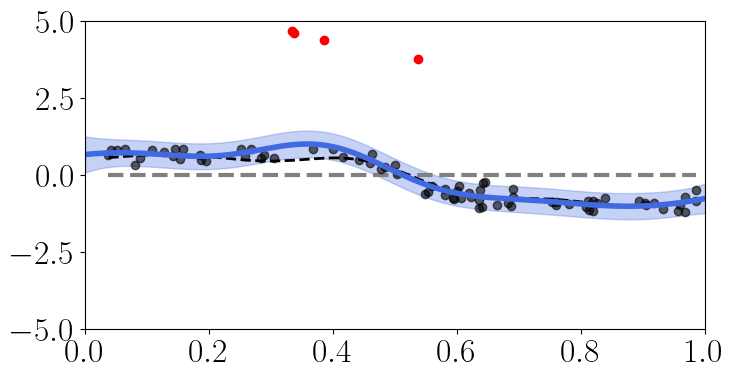

91


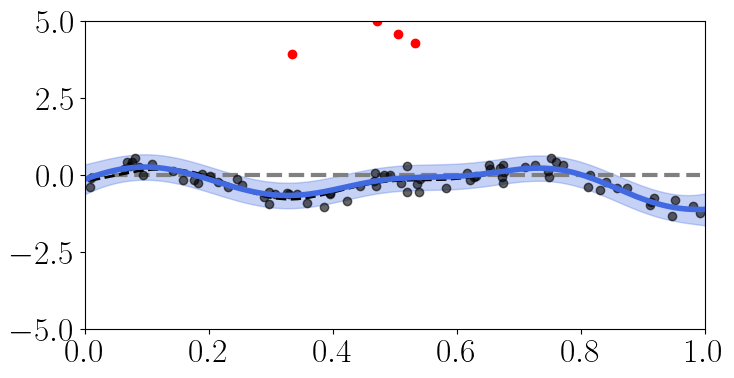

92


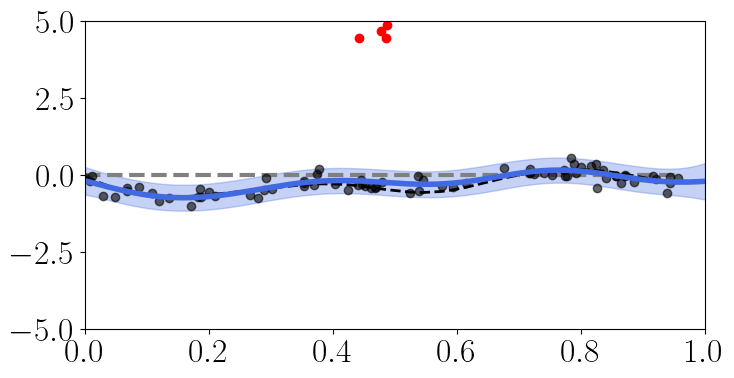

93


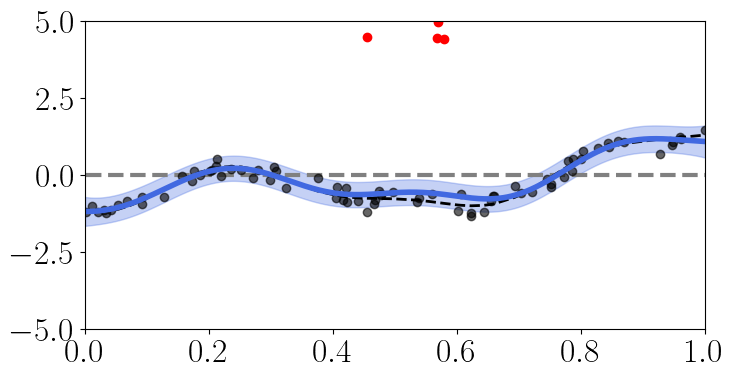

94


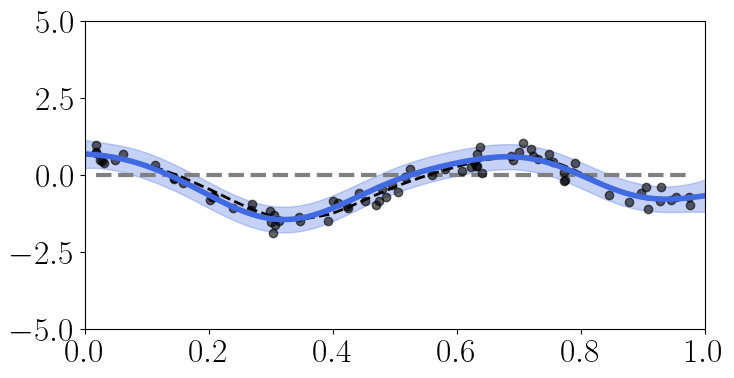

95


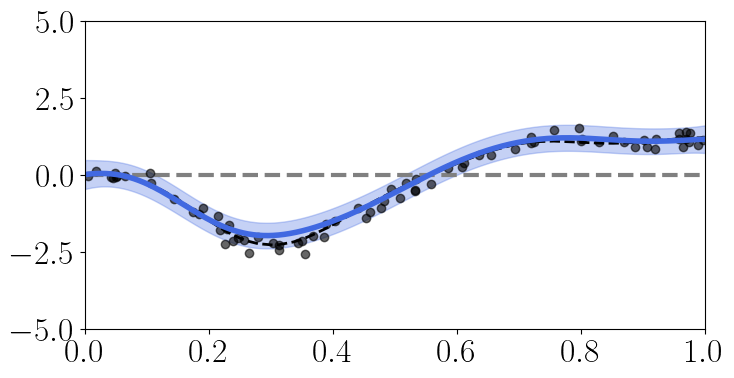

96


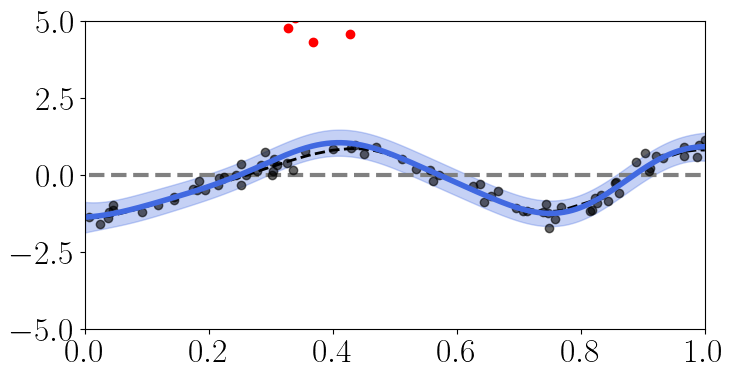

97


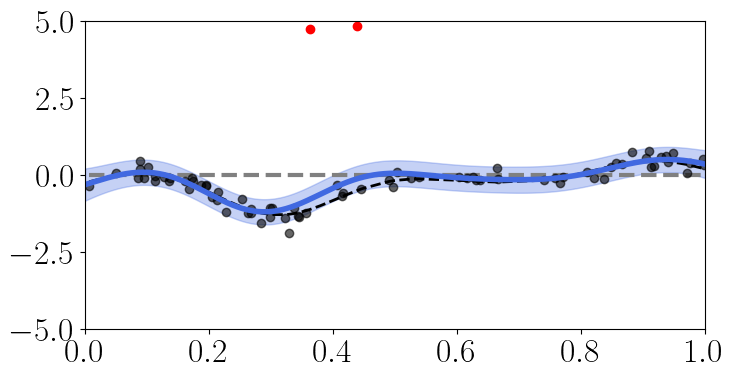

98


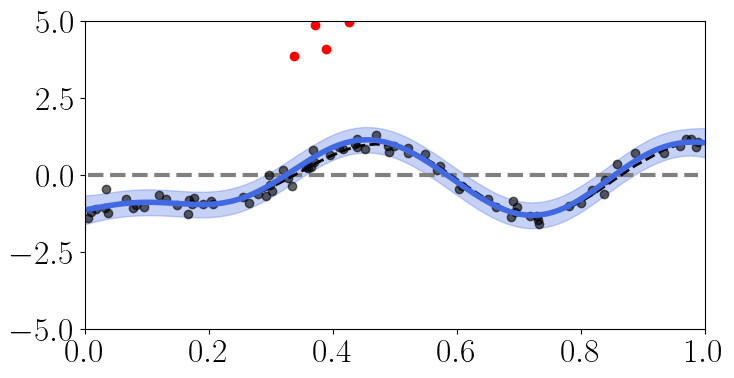

99


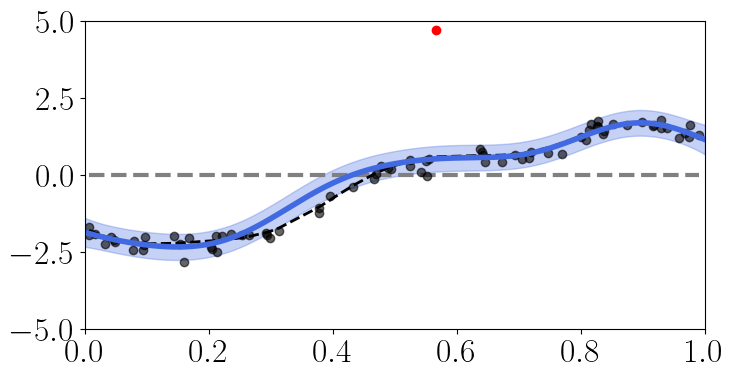

In [164]:
for i in range(35, 100):
    np.random.seed(i)
    print(i)
    # Initialisation
    epsilon = 0.05
    n_points = 80
    length_scale = 0.15
    variance = 1
    noise_variance = 0.04

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    # Add outliers
    outlier_range = np.where((x_train >= 0.3) & (x_train <= 0.60))[0]
    outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
    outlier_values = np.random.normal(loc=5, scale=0.5, size=outlier_indices.shape[0])
    y_train[outlier_indices] = outlier_values.reshape(-1,1)
    # print(outlier_indices)

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    prior_mean = ConstantMean(constant=0)
    rcgp_true = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_true.fit(x_train, y_train)

    mu_true, var_true = rcgp_true.predict(x_test)
    std_true = np.sqrt(var_true + rcgp_true.noise)

    plt.figure(figsize=(8, 4))
    plt.plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    plt.plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    plt.plot(x_test, mu_true.ravel(), color="royalblue")
    plt.fill_between(x_test.ravel(), mu_true.ravel() - 1.96 * std_true, mu_true.ravel() + 1.96 * std_true, alpha=0.3, color='royalblue')

    # # Plot
    # plt.plot(x_train, mean_y_train * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    # plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)  # darker grey, slightly transparent
    # plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)               # red dots
    # plt.plot(x_train, f_train, '--', color='black', linewidth=2)                              # thicker true function

    plt.ylim(-5, 5)
    plt.xlim(0, 1)
    plt.show()

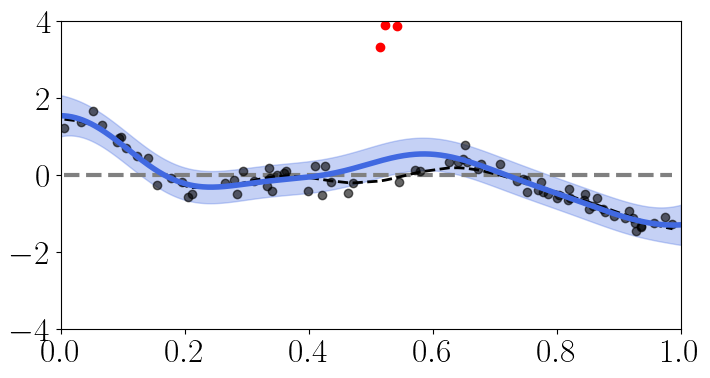

In [200]:
np.random.seed(209) # 38, 45, 46, 63
# Initialisation
epsilon = 0.05
n_points = 80
length_scale = 0.15
variance = 1
noise_variance = 0.04

# Simulation
mean_func = ConstantMean(constant=0)
rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
K_train = rbf_kernel(x_train, x_train)
f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

# Add outliers
outlier_range = np.where((x_train >= 0.45) & (x_train <= 0.55))[0]
outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
outlier_values = np.random.normal(loc=3.5, scale=0.4, size=outlier_indices.shape[0])
y_train[outlier_indices] = outlier_values.reshape(-1,1)
# print(outlier_indices)

mean_y_train = np.mean(y_train)
# print(mean_y_train)
y_train = y_train - mean_y_train

# Mask to keep all indices that are NOT outliers
mask = np.ones(len(x_train), dtype=bool)
mask[outlier_indices] = False

x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

prior_mean = ConstantMean(constant=0)
rcgp_true = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
rcgp_true.fit(x_train, y_train)

mu_true, var_true = rcgp_true.predict(x_test)
std_true = np.sqrt(var_true + rcgp_true.noise)

plt.figure(figsize=(8, 4))
plt.plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
plt.plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
plt.plot(x_test, mu_true.ravel(), color="royalblue")
plt.fill_between(x_test.ravel(), mu_true.ravel() - 1.96 * std_true, mu_true.ravel() + 1.96 * std_true, alpha=0.3, color='royalblue')

# # Plot
# plt.plot(x_train, mean_y_train * np.ones(len(x_train)), '--', color='grey', linewidth=3)
# plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)  # darker grey, slightly transparent
# plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)               # red dots
# plt.plot(x_train, f_train, '--', color='black', linewidth=2)                              # thicker true function

plt.ylim(-4, 4)
plt.xlim(0, 1)
plt.show()

Optimized length_scale: 0.0267, noise: 0.094764, rbf_variance: 0.5414
Optimized length_scale: 0.1065, noise: 0.093260, rbf_variance: 0.2123
loo_log: [ 0.17191837 -0.15204013  0.11974464  0.06787691  0.12455219  0.10975734
  0.08174185  0.15612091  0.12619244 -0.10105033  0.14479177  0.09382279
 -0.17769435  0.07261195  0.10236396 -0.27703956  0.07811341  0.07397621
  0.05044265  0.03775146 -0.06666438  0.02859922 -0.03283954 -0.32630453
 -0.13429087 -0.1070691  -0.04125853 -0.05274416 -0.17724779]
weights: []


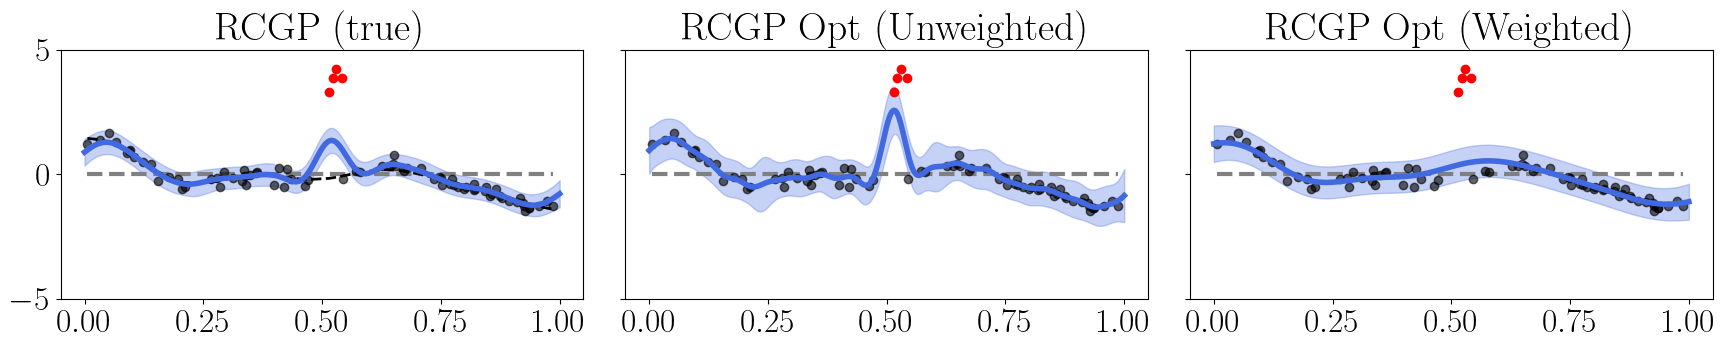

In [201]:
initial_length_scale = 0.04
initial_rbf_variance = 0.1
initial_noise = 0.04

# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# --- Plot 1: RCGP with weighted LOO-CV not optimized ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[0].set_title("RCGP (true)")

# --- Plot 2: RCGP with unweighted LOO-CV optimization ---
rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp.fit(x_train, y_train)
rcgp.optimize_loo_cv(weighted=False, print_opt_param=True, print_iter_param=False)

mu, var = rcgp.predict(x_test)
std = np.sqrt(var + rcgp.noise)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[1].plot(x_test, mu.ravel(), color="royalblue")
axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[1].set_title("RCGP Opt (Unweighted)")

# --- Plot 3: RCGP with weighted LOO-CV optimization ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)
rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=True, print_iter_param=False)

# print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
print('weights:', rcgp_w.weight.reshape(-1)[98:116])

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[2].set_title("RCGP Opt (Weighted)")

# Common settings
for ax in axs:
    ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()


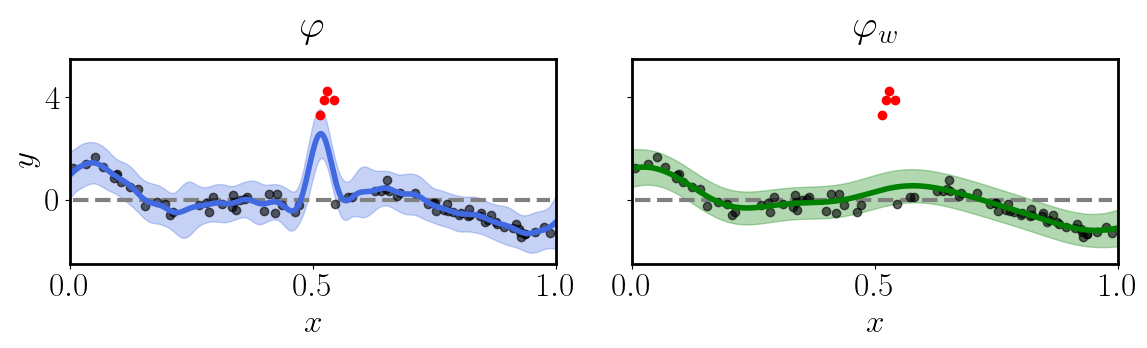

In [209]:
# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_test, mu.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[0].set_ylabel(r'$y$')
axs[0].set_title(r"$\varphi$", pad=15)

# axs[0].plot(x_test, mu.ravel(), color="royalblue", label=r'RCGP ($\varphi$)')
# axs[0].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[1].plot(x_test, mu_w.ravel(), color="green")
axs[1].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='green')
axs[1].set_title(r"$\varphi_{w}$", pad=15)

# axs[1].plot(x_test, mu_w.ravel(), color="green", label=r'RCGP ($\varphi_w$)')
# axs[1].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)


for ax in axs:
    ax.set_ylim(-2.5, 5.5)
    ax.set_xlim(0, 1)
    ax.set_yticks([0, 4])
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_xlabel(r'$x$')
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
# plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

# fig.savefig("./results/RCGP_hyperparam_opt.pdf", format='pdf', bbox_inches='tight')

## Test

209
Optimized length_scale: 0.0267, noise: 0.094764, rbf_variance: 0.5414
Optimized length_scale: 0.1065, noise: 0.093260, rbf_variance: 0.2123
loo_log: [ 0.17191837 -0.15204013  0.11974464  0.06787691  0.12455219  0.10975734
  0.08174185  0.15612091  0.12619244 -0.10105033  0.14479177  0.09382279
 -0.17769435  0.07261195  0.10236396 -0.27703956  0.07811341  0.07397621
  0.05044265  0.03775146 -0.06666438  0.02859922 -0.03283954 -0.32630453
 -0.13429087 -0.1070691  -0.04125853 -0.05274416 -0.17724779]
weights: []


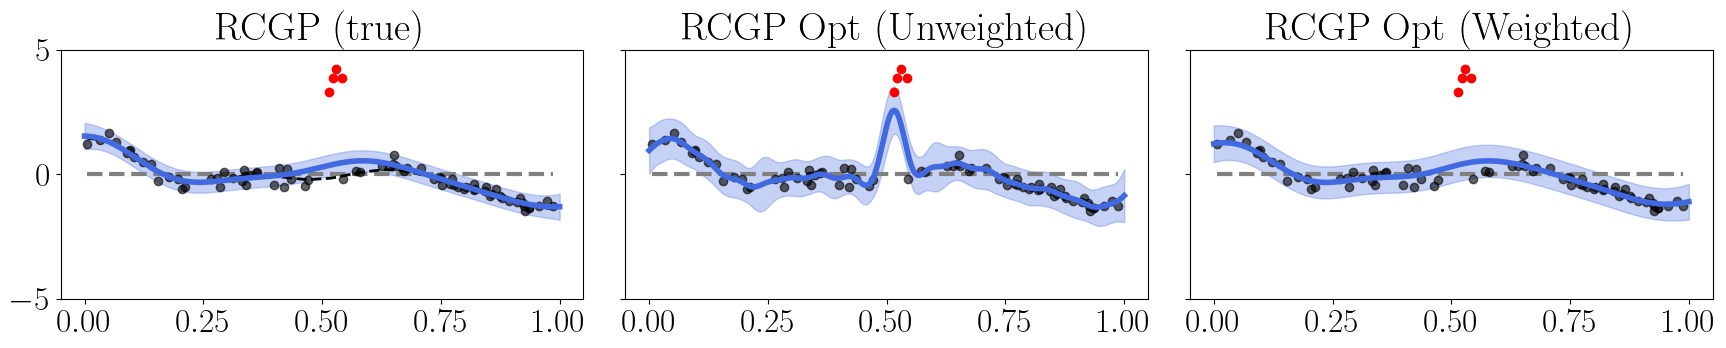

In [199]:
for i in range(209,210):
    print(i)
    np.random.seed(i)
    # Initialisation
    epsilon = 0.05
    n_points = 80
    length_scale = 0.15
    variance = 1
    noise_variance = 0.04

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    # Add outliers
    outlier_range = np.where((x_train >= 0.45) & (x_train <= 0.55))[0]
    outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
    outlier_values = np.random.normal(loc=3.5, scale=0.4, size=outlier_indices.shape[0])
    y_train[outlier_indices] = outlier_values.reshape(-1,1)
    # print(outlier_indices)

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    initial_length_scale = 0.04
    initial_rbf_variance = 0.1
    initial_noise = 0.04

    # Create subplot figure with 1 row and 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

    # --- Plot 1: RCGP with weighted LOO-CV not optimized ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[0].set_title("RCGP (true)")

    # --- Plot 2: RCGP with unweighted LOO-CV optimization ---
    rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp.fit(x_train, y_train)
    rcgp.optimize_loo_cv(weighted=False, print_opt_param=True, print_iter_param=False)

    mu, var = rcgp.predict(x_test)
    std = np.sqrt(var + rcgp.noise)

    axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[1].plot(x_test, mu.ravel(), color="royalblue")
    axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
    axs[1].set_title("RCGP Opt (Unweighted)")

    # --- Plot 3: RCGP with weighted LOO-CV optimization ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)
    rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=True, print_iter_param=False)

    # print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
    print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
    print('weights:', rcgp_w.weight.reshape(-1)[98:116])

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[2].set_title("RCGP Opt (Weighted)")

    # Common settings
    for ax in axs:
        ax.set_ylim(-5, 5)

    plt.tight_layout()
    plt.show()
